In [2]:
import numpy as np
import statsmodels.api as sm #estatiística
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import sys
import os
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
import csv
from openpyxl import load_workbook

In [3]:
#Buscar dos dados no arquivo xlsx. Resultado em DataFrame
dados = pd.read_excel('CompleteTTT3.xlsx','Sheet1', header = 1, index_col=0, usecols = 'A,BF:BP',skiprows=0, nrows=39,na_values=['NA'])
dados.head()

,log (LHβ) (erg s-¹) KTC,log (LHβ) (erg s-¹) NTT,log(LHβ) B.K (erg s-¹) NTT,Petrosian log (R50),log (R),Petrosian log (r50),log (r),log (σHβ) (Km s-¹),log(O/H),log (Whβ) FEROS,log (Whβ) NTT
Galaxy,,,,,,,,,,,
C0840+1044,39.469381,39.926840,39.926840,NaN,2.629561,NaN,2.054633,1.187521,7.73,1.643453,1.633468
N-CTS1011,40.131745,40.665483,40.025078,NaN,2.782217,NaN,2.087004,1.326336,8.18,1.968483,1.924279
N-CTS1013,39.996315,40.466786,40.466786,NaN,2.872835,NaN,2.317610,1.527630,8.08,1.579784,2.100371
N-CTS1016,40.330878,40.675040,40.675040,NaN,2.805738,NaN,2.394798,1.545307,8.36,1.414973,1.431364
N-CTS1017 $ §,40.485009,40.909697,40.909697,NaN,2.723339,NaN,2.416176,1.442480,7.98,2.206826,2.267172


In [4]:
dados.describe() #Resumo estatístico da amostra

,log (LHβ) (erg s-¹) KTC,log (LHβ) (erg s-¹) NTT,log(LHβ) B.K (erg s-¹) NTT,Petrosian log (R50),log (R),Petrosian log (r50),log (r),log (σHβ) (Km s-¹),log(O/H),log (Whβ) FEROS,log (Whβ) NTT
count,39.000000,39.000000,39.000000,0.0,39.000000,0.0,39.000000,39.000000,39.000000,39.000000,39.000000
mean,39.850131,40.322364,40.128770,NaN,2.684138,NaN,1.982879,1.367094,7.865897,1.591246,1.612762
std,0.489049,0.464003,0.495317,NaN,0.280296,NaN,0.277890,0.135130,1.317855,0.504909,0.418735
min,39.021764,39.484314,39.267863,NaN,1.857224,NaN,1.375612,1.096910,0.000000,0.000000,0.778151
25%,39.509315,39.936504,39.771948,NaN,2.533872,NaN,1.828446,1.245506,7.905000,1.332321,1.379834
50%,39.815896,40.288085,40.075666,NaN,2.720752,NaN,2.021753,1.354108,8.010000,1.643453,1.633468
75%,40.100649,40.616339,40.425890,NaN,2.839625,NaN,2.190813,1.456363,8.255000,1.894155,1.956111
max,41.003284,41.288967,41.184454,NaN,3.143277,NaN,2.469942,1.769377,8.710000,2.728354,2.324282


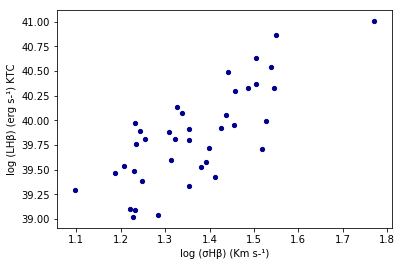

In [5]:
dados.plot.scatter(7,0,s=18,c='darkblue',fontsize=10) #plot de teste

In [6]:
#Seleção dos parâmetros para regressão
x2 = np.array(dados.iloc[:,6])  ; x1 = np.array(dados.iloc[:,7]) ; y = np.array(dados.iloc[:,0])
listX = (x1,x2)

In [117]:
#Resumo da regressão multipla L - sigma - R
x = np.column_stack(listX)
x = sm.add_constant(x, prepend=True)
model = sm.OLS(y,x) #Cria e ajusta o modelo
results = model.fit()
par = results.params #coef
des = results.bse #erros
Y = results.predict() #lista de y resultantes da regressão
  
print("y = (%1.2f +- %1.2f) + (%1.2f +- %1.2f)x1 + (%1.2f +- %1.2f)x2" % (par[0],des[0],par[1],des[1],par[2],des[2]))
residuo_quad = np.array(list(map(lambda y1,Y1: (y1-Y1)**2 ,y,Y)))
RMS = (np.mean(residuo_quad))**0.5
print('\n'+'RMS = %.3f' %(RMS))

print(results.summary())


y = (35.84 +- 0.48) + (2.04 +- 0.43)x1 + (0.61 +- 0.21)x2

RMS = 0.277
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     36.86
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           1.94e-09
Time:                        16:43:16   Log-Likelihood:                -5.2037
No. Observations:                  39   AIC:                             16.41
Df Residuals:                      36   BIC:                             21.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

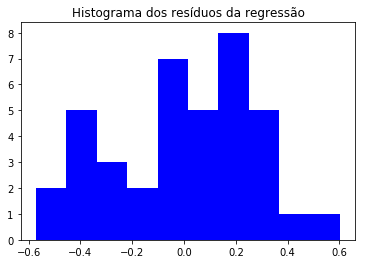

[-0.05842437  0.30078203 -0.38714413 -0.13609629  0.21471881  0.21886554
  0.04273768 -0.23365218 -0.09929671  0.09473986 -0.07124677  0.24048578
  0.48183119 -0.21852413 -0.47579641  0.00367089 -0.2339664   0.14119372
  0.20105353 -0.35998149  0.33661618  0.15302973 -0.10124042  0.31106271
  0.03289302  0.0143993   0.31726259  0.19619264  0.60260558 -0.37008866
 -0.57207656 -0.27865291  0.02590113 -0.08060476  0.05810055  0.27096789
 -0.39256051  0.21424496 -0.40400261]


In [124]:
#Residuos
residuo = np.array(list(map(lambda y1,Y1: (y1-Y1),y,Y)))
plt.hist(residuo, color='blue', bins=10)
plt.title('Histograma dos resíduos da regressão')
plt.show()
print(residuo)



RMS = 0.308
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     53.74
Date:                Mon, 03 Feb 2020   Prob (F-statistic):           1.03e-08
Time:                        16:52:52   Log-Likelihood:                -9.4419
No. Observations:                  39   AIC:                             22.88
Df Residuals:                      37   BIC:                             26.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0425      0.522     69

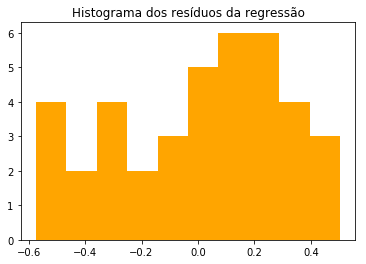

[ 0.1193993   0.39513412 -0.30094087 -0.01561231  0.42491379  0.21068739
  0.10269111 -0.09077265  0.00861863 -0.10091268 -0.55628359  0.09075052
  0.50036448 -0.38777166 -0.4774703   0.14580989 -0.21703093  0.29918398
  0.27515529 -0.34260606  0.3949166   0.19404714 -0.34061478  0.13350509
  0.03271176  0.01838088  0.38612616  0.1954794   0.50345675 -0.355962
 -0.54817773 -0.14673985 -0.13073479 -0.01466891  0.13770395  0.19751967
 -0.57435825  0.27474645 -0.44064499]


In [125]:
#Analise L - sigma
xx = sm.add_constant(x1, prepend=True)
modell = sm.OLS(y,xx) #Cria e ajusta o modelo
resultss = modell.fit()
z = resultss.predict() #lista de y resultantes da regressão

#Residuos
residuoo = np.array(list(map(lambda y1,Y1: (y1-Y1),y,z)))
residuoo_quad = list(map(lambda k: k**2, residuoo))
RMSs = (np.mean(residuoo_quad))**0.5
print('\n'+'RMS = %.3f' %(RMSs))

print(resultss.summary())

plt.hist(residuoo, color='orange', bins=10)
plt.title('Histograma dos resíduos da regressão')
plt.show()
print(residuoo)

,log (LHβ) (erg s-¹) KTC,log (LHβ) (erg s-¹) NTT,log(LHβ) B.K (erg s-¹) NTT,Petrosian log (R50),log (R),Petrosian log (r50),log (r),log (σHβ) (Km s-¹),log(O/H),log (Whβ) FEROS,log (Whβ) NTT,teste
Galaxy,,,,,,,,,,,,
C0840+1044,39.469381,39.926840,39.926840,NaN,2.629561,NaN,2.054633,1.187521,7.73,1.643453,1.633468,39.527806
N-CTS1011,40.131745,40.665483,40.025078,NaN,2.782217,NaN,2.087004,1.326336,8.18,1.968483,1.924279,39.830963
N-CTS1013,39.996315,40.466786,40.466786,NaN,2.872835,NaN,2.317610,1.527630,8.08,1.579784,2.100371,40.383459
N-CTS1016,40.330878,40.675040,40.675040,NaN,2.805738,NaN,2.394798,1.545307,8.36,1.414973,1.431364,40.466975
N-CTS1017 $ §,40.485009,40.909697,40.909697,NaN,2.723339,NaN,2.416176,1.442480,7.98,2.206826,2.267172,40.270290


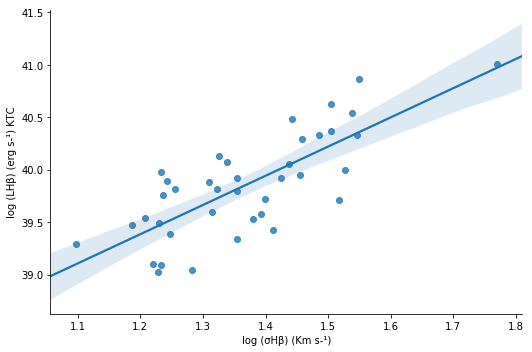

In [182]:
#gráfico com margem de erro 
import seaborn as sea
sea.lmplot(dados.columns[7], dados.columns[0], data = dados, aspect= 1.5,legend=True, legend_out=True , x_ci='sd', fit_reg = True) # L - Sigma
dados['teste'] = Y
#sea.lmplot(dados.columns[11], dados.columns[0], data = dados, col = dados.columns[6] ,  markers='x', fit_reg = True) # L - sigma - R
dados.head()

Principal Component Analysis(nobs: 39, nvar: 11, transformation: Standardize (Correlation), normalization: True, number of components: 11, SVD)


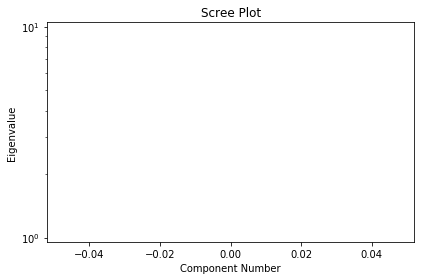

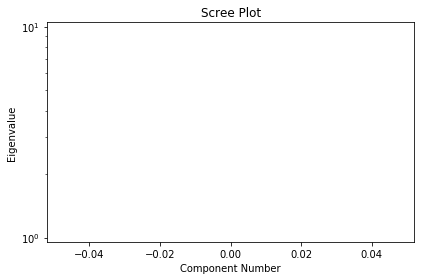

In [98]:
#Teste de PCA, ainda em estudo
#sm.stats.linear_rainbow(results)
#sm.graphics.plot_partregress(dados.columns[7], dados.columns[0], exog_others = [ 'urban' , 'poverty' , 'single' ], data = dados, obs_labels=False)
from statsmodels.multivariate.pca import PCA
pc = sm.PCA(dados, ncomp=11, method='nipals')
#pc = PCA(x)
print(pc)
pc.plot_scree(ncomp=11,log_scale = True)

Principal Component Analysis(nobs: 100, nvar: 100, transformation: Standardize (Correlation), normalization: True, number of components: 100, SVD)


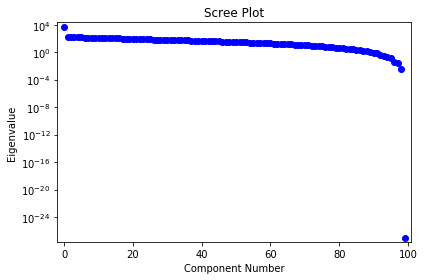

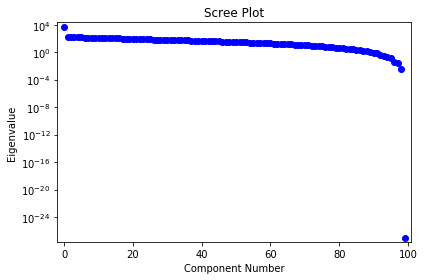

In [72]:
from statsmodels.multivariate.pca import PCA
x = np.random.randn(100)[:, None]
x = x + np.random.randn(100, 100)
pc = sm.PCA(x)
print(pc)
pc.factors.shape
pc.plot_scree(ncomp=100)

In [14]:
help(PCA)

Help on class PCA in module statsmodels.multivariate.pca:

class PCA(builtins.object)
 |  PCA(data, ncomp=None, standardize=True, demean=True, normalize=True, gls=False, weights=None, method='svd', missing=None, tol=5e-08, max_iter=1000, tol_em=5e-08, max_em_iter=100)
 |  
 |  Principal Component Analysis
 |  
 |  Parameters
 |  ----------
 |  data : array-like
 |      Variables in columns, observations in rows
 |  ncomp : int, optional
 |      Number of components to return.  If None, returns the as many as the
 |      smaller of the number of rows or columns in data
 |  standardize: bool, optional
 |      Flag indicating to use standardized data with mean 0 and unit
 |      variance.  standardized being True implies demean.  Using standardized
 |      data is equivalent to computing principal components from the
 |      correlation matrix of data
 |  demean : bool, optional
 |      Flag indicating whether to demean data before computing principal
 |      components.  demean is ignore